<strong>Imports

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats as stats
import seaborn as sb

spamdata = pd.read_csv("spambase.csv")


<strong>1. Create a line chart to visualize the distribution of the 'capitalLong' feature.

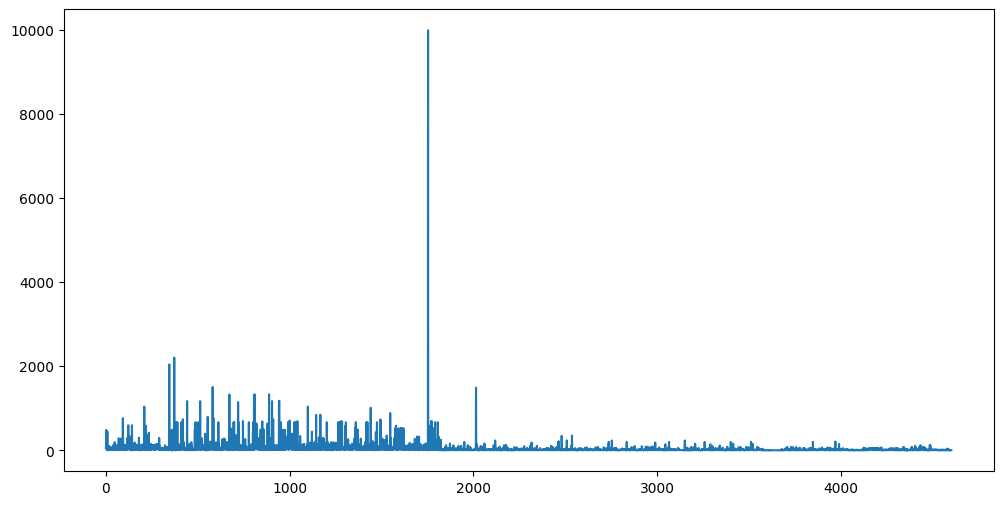

In [97]:
plt.figure(figsize=(12,6))
plt.plot(spamdata['capitalLong'])

<strong>2. Generate a bar chart to show the frequency of 'type' (spam and nonspam) in the dataset.

<Axes: title={'center': 'Frequency of Spam and Nonspam'}, xlabel='type'>

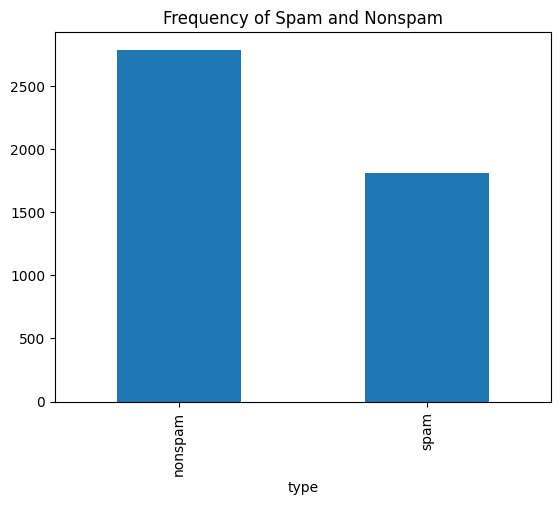

In [98]:
freq = spamdata["type"].value_counts().sort_index()
freq.plot.bar(title="Frequency of Spam and Nonspam")

<strong>3. Create a scatter plot to explore the relationship between 'num3d' and 'num000'.

<Axes: xlabel='num3d', ylabel='num000'>

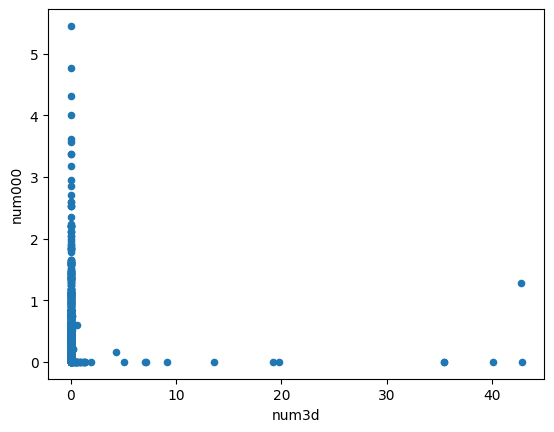

In [99]:
spamdata.plot.scatter(x='num3d',y='num000')

<strong>4. Visualize the distribution of 'money' using a histogram.

array([[<Axes: title={'center': 'money'}>]], dtype=object)

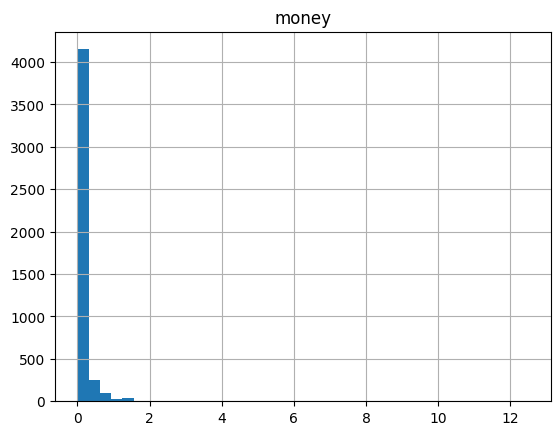

In [100]:
spamdata.hist(column='money',bins=40,)

<strong>5. Create a pie chart to represent the proportion of spam and nonspam emails in the dataset.

<Axes: ylabel='count'>

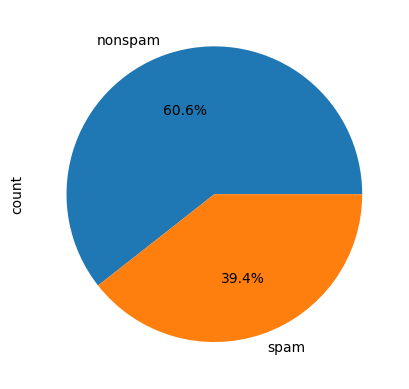

In [101]:
freq.plot.pie(autopct='%1.1f%%')

<strong>6. Generate a table chart to display the summary statistics for the 'capitalAve' feature.

In [102]:
summary = spamdata['capitalAve'].describe()
df = pd.DataFrame(summary)

styler = df.style
styler

,capitalAve
count,4601.000000
mean,5.191515
std,31.729449
min,1.000000
25%,1.588000
50%,2.276000
75%,3.706000
max,1102.500000


<strong>7. Calculate the mean, median, and standard deviation of the 'our' feature.

In [103]:
mean = statistics.mean(spamdata['our'])
median = statistics.median(spamdata['our'])
std = statistics.stdev(spamdata['our'])

print("mean: ")
print(mean)
print()
print("median:")
print(median)
print()
print("std:")
print(std)

mean: 
0.31222342968919803

median:
0.0

std:
0.672512769284666


<strong>8. Determine the minimum and maximum values of 'hp'.

In [104]:
print("min:")
print(spamdata['hp'].min())
print()
print("max:")
print(spamdata['hp'].max())
print()

min:
0.0

max:
20.83



<strong>9. Calculate the 25th, 50th, and 75th percentiles for 'telnet'.

In [105]:
percentile_25 = np.percentile(spamdata['telnet'], 25)
percentile_50 = np.percentile(spamdata['telnet'], 50)
percentile_75 = np.percentile(spamdata['telnet'], 75)


print("25th percentile:")
print(percentile_25)
print()
print("50th percentile:")
print(percentile_50)
print()
print("75th percentile:")
print(percentile_75)
print()

25th percentile:
0.0

50th percentile:
0.0

75th percentile:
0.0



<strong>10. Find the mode of the 'you' feature.

In [106]:
mode = statistics.mode(spamdata['you'])

print("mode:")
print(mode)

mode:
0.0


<strong>11. Calculate the interquartile range (IQR) for 'business'.

In [107]:
q3, q1 = np.percentile(spamdata['business'], [75 ,25])
iqr = q3 - q1

print("IQR:")
print(iqr)

IQR:
0.0


<strong>12. Compute the skewness and kurtosis of the 'credit' feature.

In [108]:
skewness = stats.skew(spamdata['credit'])
kurtosis = stats.kurtosis(spamdata['credit'], fisher=False)

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 14.597825535437874
Kurtosis: 385.58448866619705


<strong>13. Calculate the correlation coefficient between 'capitalAve' and 'capitalTotal'.

In [109]:
r = np.corrcoef(spamdata['capitalAve'], spamdata['capitalTotal'])

print("Correlation Coefficient: ", r[0,1])

Correlation Coefficient:  0.1623136090977767


<strong>14. Determine the range of values for 'num857'.

In [110]:
range = spamdata['num857'].max() - spamdata['num857'].min()

print("range: ", range)

range:  4.76


<strong>15. Calculate the variance of 'money'.

In [111]:
variance = statistics.variance(spamdata['money'])

print("Variance: ", variance)

Variance:  0.19592620955746862


<strong>16. Generate a correlation matrix for all numeric features in the dataset.

In [112]:
corr_matrix = spamdata.corr(numeric_only=True)

print(corr_matrix)

                       make   address       all     num3d       our      over  \
make               1.000000 -0.016759  0.065627  0.013273  0.023119  0.059674   
address           -0.016759  1.000000 -0.033526 -0.006923 -0.023760 -0.024840   
all                0.065627 -0.033526  1.000000 -0.020246  0.077734  0.087564   
num3d              0.013273 -0.006923 -0.020246  1.000000  0.003238 -0.010014   
our                0.023119 -0.023760  0.077734  0.003238  1.000000  0.054054   
over               0.059674 -0.024840  0.087564 -0.010014  0.054054  1.000000   
remove             0.007669  0.003918  0.036677  0.019784  0.147336  0.061163   
internet          -0.003950 -0.016280  0.012003  0.010268  0.029598  0.079561   
order              0.106263 -0.003826  0.093786 -0.002454  0.020823  0.117438   
mail               0.041198  0.032962  0.032075 -0.004947  0.034495  0.013897   
receive            0.188459 -0.006864  0.048254 -0.012976  0.068382  0.053900   
will               0.105801 

<strong>17. Identify the two features with the highest positive correlation and the two with the highest
negative correlation.

In [113]:
print(corr_matrix.unstack().sort_values().drop_duplicates())

you           hp             -0.197683
hpl           you            -0.162800
you           george         -0.154758
hp            your           -0.154633
your          hpl            -0.135311
                                ...   
num857        telnet          0.737555
direct        num415          0.845359
              num857          0.848021
num857        num415          0.996066
capitalTotal  capitalTotal    1.000000
Length: 1597, dtype: float64


Highest Positive:

num857,num415: 0.996066

direct,num857: 0.848021

Highest Negative:

you,hp: -0.197683

hpl,you: -0.162800

<strong>18. Visualize the correlation matrix using a heatmap

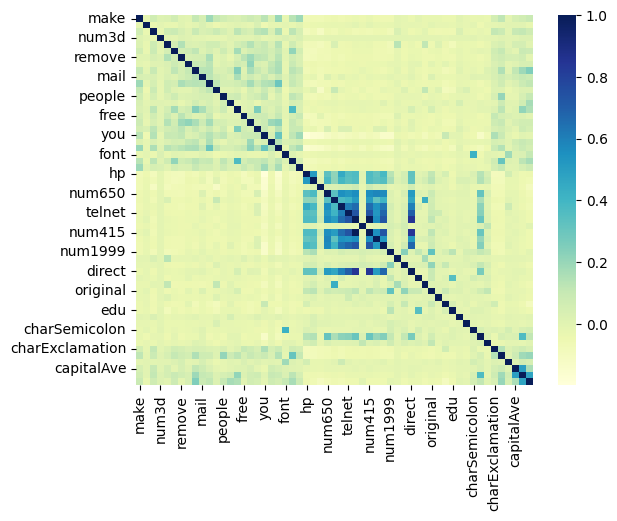

In [114]:
dataplot = sb.heatmap(spamdata.corr(numeric_only=True), cmap="YlGnBu",)

<strong>19. Calculate the correlation coefficient between 'remove' and 'internet'.

In [115]:
print(spamdata['remove'].corr(spamdata['internet']))

0.04454545525308315


<strong>20. Determine the correlation between 'num3d' and 'num000'.

In [116]:
print(spamdata['num3d'].corr(spamdata['num000']))

0.01136760291269134


<strong>21. Perform a correlation analysis between 'font' and 'money'.

<Axes: xlabel='font', ylabel='money'>

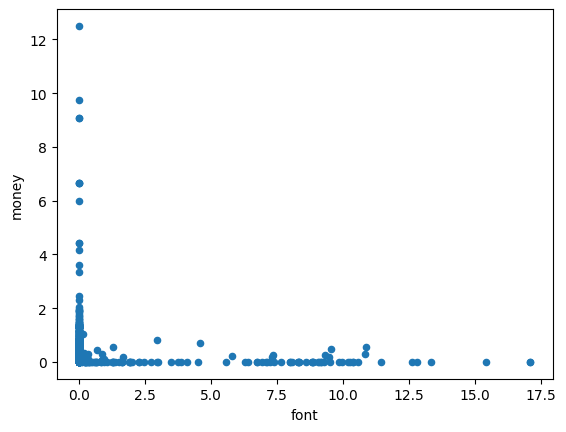

In [117]:
spamdata.plot.scatter(x='font',y='money')

In [118]:
print(spamdata['font'].corr(spamdata['money']))

-0.0109145780550057


The correlation does not appear to be statistically significant.

<strong>22. Calculate the correlation between 'table' and 'technology'.

In [119]:
print(spamdata['table'].corr(spamdata['technology']))

-0.0006087120614568614


<strong>23. Describe the characteristics of data that make a bar chart suitable for visualization.


Bar charts are great when data is in different categories. They can then show which category is bigger or smaller, which makes it easy to compare. 

<strong>24. Explain when it is appropriate to use a scatter plot for data exploration.

Scatter plots are good at showing the relationship between two things. It could show that the hours someone spends on their homework has a relationship with how good of a grade they get. After you get multiple points of data you can then look at the chart to find patterns or trends. 

<strong>25. Discuss the advantages and disadvantages of using a pie chart for categorical data.

Pie charts are good at showing how much a certain dataset makes up the whole. They are very good as long as you don't have too many different categories or if the categories are similar in value. This is because it would be too confusing or hard to differentiate the categories. 

<strong>26. When would you choose a line chart over a histogram for data visualization?

You would want to choose a line chart over a histogram when you want to show the change of data over time. You could use this for average household income per year. Line charts are good at showing increases and decreases, and histograms are good at showing how data is spread out or grouped. 

<strong>27. Describe a scenario where a table chart is more informative than other chart types.

Table charts are good for showing exact numbers of data. For example if trying to see the price of groceries at Walmart. A table chart will be able to show the price clearly, which is not as easy with a graph. 

<strong>28. Explain the key insights you can gain from a histogram.

A histogram helps you to see how data is spread out. For a teacher it could show how many people scored in certain ranges. It shows if the results of students are consistent, inconsistent, or if there are outliers. This helps people get a grasp of the pattern of the data. 